In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sys import setrecursionlimit
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn import metrics
init_notebook_mode(connected=True)

# The Dataset from:
# Jain, Kanishka (2020), “6000+ Indian Food Recipes Dataset”, Mendeley Data, V1, doi: 10.17632/xsphgmmh7b.1

# http://dx.doi.org/10.17632/xsphgmmh7b.1

In [2]:
df = pd.read_csv("IndianFoodDatasetCSV.csv")

In [3]:
df.head()

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


In [4]:
#delete hindi
df = df.drop(df.columns[[0,1,3,12,-1]], 1)

In [5]:
#change the name column
df = df.rename(columns={"TranslatedRecipeName": "recipeName", "TranslatedIngredients": "ingredients","TranslatedInstructions" : "instructions"})

In [6]:
df.head()

,recipeName,ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,instructions
0,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se..."
1,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,"To make tomato puliogere, first cut the tomato..."
2,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi..."
3,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...
4,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,"To make Andhra Style Alam Pachadi, first heat ..."


In [7]:
#check if there are contradiction in the data. assume that the total time need to be bigger than cooking time
(df['CookTimeInMins'] > df['TotalTimeInMins']).sum()

0

In [8]:
df.columns


Index(['recipeName', 'ingredients', 'PrepTimeInMins', 'CookTimeInMins',
       'TotalTimeInMins', 'Servings', 'Cuisine', 'Course', 'Diet',
       'instructions'],
      dtype='object')

In [9]:
df.isnull().values.sum()
#clean the Nan only 6 rows

6

In [10]:
#find which rows
nan_rows = df[df.isnull().T.any()]
nan_rows

,recipeName,ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,instructions
287,Pear And Walnut Salad Recipe,NaN,10,30,40,2,Continental,Appetizer,Vegetarian,To begin making the Pear And Walnut Salad Reci...
1262,Spinach and Cottage Cheese Eggless Ravioli Recipe,NaN,25,60,85,3,Italian Recipes,Dinner,Vegetarian,To begin with the Spinach and Cottage Cheese E...
1809,Thai Jasmine Sticky Rice Recipe,NaN,30,20,50,4,North Indian Recipes,Lunch,Vegetarian,"To begin making the Thai Jasmine Rice, we will..."
1827,Classic Pavakkai Stir Fry Recipe (Bitter Gourd...,NaN,30,0,30,4,Greek,Appetizer,Vegetarian,"To begin making the Classic Pavakkai Stir Fry,..."
5386,Urulaikizhangu Puli Thokku Recipe (South India...,NaN,15,40,55,4,South Indian Recipes,Lunch,Vegetarian,To begin making Urulaikizhangu Puli Thokku Rec...
5586,Mashed Peas Recipe,NaN,20,25,45,4,North Indian Recipes,North Indian Breakfast,Vegetarian,"To begin making the Mashed Peas, first cook th..."


In [11]:
#drop the Nan rows
df = df.dropna()
df.isnull().values.sum()

0

In [12]:
df['Course'].unique()

array(['Side Dish', 'Main Course', 'South Indian Breakfast', 'Lunch',
       'Snack', 'High Protein Vegetarian', 'Dinner', 'Appetizer',
       'Indian Breakfast', 'Dessert', 'North Indian Breakfast',
       'One Pot Dish', 'World Breakfast', 'Non Vegeterian', 'Vegetarian',
       'Eggetarian', 'No Onion No Garlic (Sattvic)', 'Brunch', 'Vegan',
       'Sugar Free Diet'], dtype=object)

In [13]:
df['Cuisine'].unique()

array(['Indian', 'South Indian Recipes', 'Andhra', 'Udupi', 'Mexican',
       'Fusion', 'Continental', 'Bengali Recipes', 'Punjabi', 'Chettinad',
       'Tamil Nadu', 'Maharashtrian Recipes', 'North Indian Recipes',
       'Italian Recipes', 'Sindhi', 'Thai', 'Chinese', 'Kerala Recipes',
       'Gujarati Recipes\ufeff', 'Coorg', 'Rajasthani', 'Asian',
       'Middle Eastern', 'Coastal Karnataka', 'European', 'Kashmiri',
       'Karnataka', 'Lucknowi', 'Hyderabadi', 'Side Dish', 'Goan Recipes',
       'Arab', 'Assamese', 'Bihari', 'Malabar', 'Himachal', 'Awadhi',
       'Cantonese', 'North East India Recipes', 'Sichuan', 'Mughlai',
       'Japanese', 'Mangalorean', 'Vietnamese', 'British',
       'North Karnataka', 'Parsi Recipes', 'Greek', 'Nepalese',
       'Oriya Recipes', 'French', 'Indo Chinese', 'Konkan',
       'Mediterranean', 'Sri Lankan', 'Haryana', 'Uttar Pradesh',
       'Malvani', 'Indonesian', 'African', 'Shandong', 'Korean',
       'American', 'Kongunadu', 'Pakistani', 'C

In [14]:
df['Diet'].unique()

array(['Diabetic Friendly', 'Vegetarian', 'High Protein Vegetarian',
       'Non Vegeterian', 'High Protein Non Vegetarian', 'Eggetarian',
       'Vegan', 'No Onion No Garlic (Sattvic)', 'Gluten Free',
       'Sugar Free Diet'], dtype=object)

<Figure size 720x360 with 0 Axes>

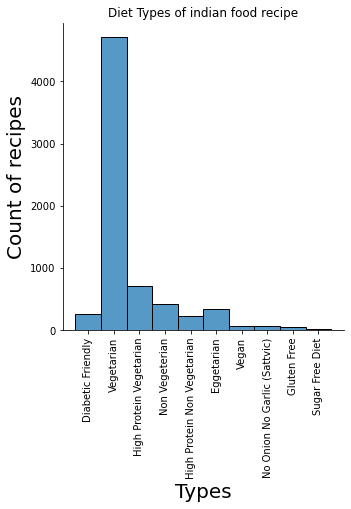

In [15]:
plt.figure(figsize=(10,5))
data = df['Diet']
f = sns.displot(data, discrete=True).set(title = "Diet Types of indian food recipe")
f.set_xticklabels(rotation=90)
f.set_xlabels("Types",fontsize=20)
f.set_ylabels("Count of recipes",fontsize=20)

f.savefig('Diet Types of indian food recipe.jpg')
plt.show()

# **We can see that the Vegetarian is the most common**

<Figure size 720x360 with 0 Axes>

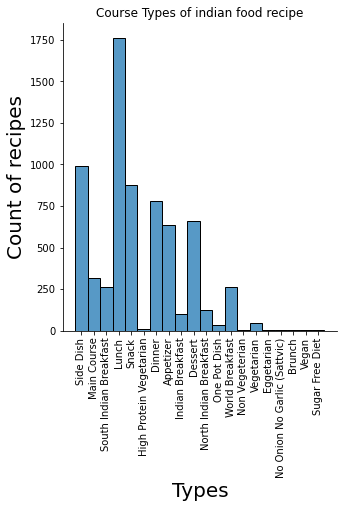

In [16]:
plt.figure(figsize=(10,5))
data_course = df['Course']
f = sns.displot(data_course, discrete=True).set(title = "Course Types of indian food recipe")
f.set_xticklabels(rotation=90)
f.set_xlabels("Types",fontsize=20)
f.set_ylabels("Count of recipes",fontsize=20)

f.savefig('Course Types of indian food recipe.jpg')
plt.show()

In [17]:
course = list(df.Course.unique())
course_count = list(df["Course"].value_counts().reset_index(name="count").query("count > 55")["count"]) 
course_count

[1763, 992, 876, 781, 659, 637, 315, 260, 260, 122, 101]

In [18]:

import plotly 
import plotly.graph_objects as go 
import plotly.offline as pyo 
from plotly.offline import init_notebook_mode

labels = course
values = course_count

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

# **The most common is the Lunch**

In [19]:
sub_category_Diet = df['Diet'].value_counts()

In [20]:
sub_category_Diet.shape

(10,)

# **PCA and Standard Scaler**

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
df2 = df.copy()

In [23]:
df2.columns

Index(['recipeName', 'ingredients', 'PrepTimeInMins', 'CookTimeInMins',
       'TotalTimeInMins', 'Servings', 'Cuisine', 'Course', 'Diet',
       'instructions'],
      dtype='object')

In [24]:
df2.ingredients = df2.ingredients.str.lower()

In [25]:
veg_ingredients = df2.loc[df2.Diet == "Vegetarian", "ingredients"]
non_veg_ingredients = df2.loc[df2.Diet == "Non Vegeterian", "ingredients"]

In [26]:
veg_ingredients.size + non_veg_ingredients.size

5133

In [27]:
veg_ingredients.str.split(",")

1       [2-1 / 2 cups rice - cooked,  3 tomatoes,  3 t...
4       [1 tablespoon chana dal,  1 tablespoon white u...
6       [500 grams vellai poosanikai (ash gourd/white ...
7       [4 tortillas, 1/4 cup black beans - soaked ove...
8       [10 idli - cut into strips, 1 cup green bell p...
                              ...                        
6863    [2 cups paneer (homemade cottage cheese) - cru...
6864    [1-1/2 cup risotto - cooked risotto (recipe be...
6865    [1 cup quinoa, 3/4 cup sugar, 1 teaspoon carda...
6866    [20 बटन मशरुम, 2 प्याज - काट ले, 1 टमाटर - बार...
6868    [150 grams spring onion (bulb & greens) - chop...
Name: ingredients, Length: 4706, dtype: object

In [28]:
veg_ingredients = veg_ingredients.str.strip()
non_veg_ingredients = non_veg_ingredients.str.strip()

veg_cleaned_ingredients = []
non_veg_cleaned_ingredients = []

for i in veg_ingredients.str.split(","): # split by "," & iterate through all the ingredients and append it to list
    veg_cleaned_ingredients += i

for i in non_veg_ingredients.str.split(","):#split by , & iterate through all the ingredients and append it to list
    non_veg_cleaned_ingredients += i

In [29]:
final_veg_ingredients = pd.Series(veg_cleaned_ingredients)
final_non_veg_ingredients = pd.Series(non_veg_cleaned_ingredients)

# let's remove extra spaces
final_veg_ingredients = final_veg_ingredients.str.strip()
final_non_veg_ingredients = final_non_veg_ingredients.str.strip()

# let's count how many tim ingredients are repeated and make a data frame
final_veg_ingredients = final_veg_ingredients.value_counts().reset_index()
final_veg_ingredients.columns = ["ingredients", "count"]

final_non_veg_ingredients = final_non_veg_ingredients.value_counts().reset_index()
final_non_veg_ingredients.columns = ["ingredients", "count"]

In [30]:
top_veg_ingredients = final_veg_ingredients.head(20)
top_non_veg_ingredients = final_non_veg_ingredients.head(20)

# here let's append both and make our final ingredients

final_ingredients = top_veg_ingredients.append(top_non_veg_ingredients).reset_index(drop = True)
final_ingredients.head()

,ingredients,count
0,salt - to taste,2352
1,1/2 teaspoon turmeric powder (haldi),480
2,1 teaspoon cumin seeds (jeera),457
3,1 onion - finely chopped,457
4,1 teaspoon red chilli powder,441


In [31]:
final_ingredients[final_ingredients.ingredients.duplicated(keep = False)]

,ingredients,count
0,salt - to taste,2352
1,1/2 teaspoon turmeric powder (haldi),480
2,1 teaspoon cumin seeds (jeera),457
3,1 onion - finely chopped,457
4,1 teaspoon red chilli powder,441
11,1 teaspoon turmeric powder (haldi),268
17,1 onion - chopped,212
18,1 teaspoon coriander powder (dhania),192
20,salt - to taste,336
21,1/2 teaspoon turmeric powder (haldi),88


In [32]:
final_ingredients = final_ingredients.groupby("ingredients")["count"].sum().reset_index()

# let's sort it by count

final_ingredients = final_ingredients.sort_values("count", ascending = False).reset_index(drop = True)
final_ingredients.head()

,ingredients,count
0,salt - to taste,2688
1,1/2 teaspoon turmeric powder (haldi),568
2,1 teaspoon red chilli powder,517
3,1 teaspoon cumin seeds (jeera),510
4,1 onion - finely chopped,501


In [33]:
final_ingredients.ingredients.nunique()

32

In [34]:
for i in final_ingredients.ingredients:
    df2[i] = 0 # here i create a column of particular ingredients and assign all value as 0
    df2.loc[df2.ingredients.str.contains(i), [i]] = 1

C:\yotambraun\anaconda\lib\site-packages\pandas\core\strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [35]:
df2.head()

,recipeName,ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,instructions,...,1 teaspoon garam masala powder,1 teaspoon cumin powder (jeera),2 cardamom (elaichi) pods/seeds,4 cloves garlic - chopped,1 bay leaf (tej patta),sunflower oil - as required,1 teaspoon sugar,1 teaspoon fennel seeds (saunf),2 cloves (laung),1 inch ginger - chopped
0,Masala Karela Recipe,"6 karela (bitter gourd/ pavakkai) - deseeded,s...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...",...,0,0,0,0,0,1,0,0,0,0
1,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,"To make tomato puliogere, first cut the tomato...",...,0,0,0,0,0,0,0,0,0,0
2,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups rice vermicelli noodles (thin),1 on...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...",...,0,0,0,0,0,0,0,0,0,0
3,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams chicken,2 onion - chopped,1 tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,...,1,0,0,0,0,0,0,0,0,0
4,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,"To make Andhra Style Alam Pachadi, first heat ...",...,0,0,0,0,0,0,0,0,0,0


In [36]:
#df2.set_index("recipeName", inplace = True)
df3 = df2.drop(columns=["recipeName","ingredients","instructions","Diet","TotalTimeInMins"])

In [37]:
df3.head()

,PrepTimeInMins,CookTimeInMins,Servings,Cuisine,Course,salt - to taste,1/2 teaspoon turmeric powder (haldi),1 teaspoon red chilli powder,1 teaspoon cumin seeds (jeera),1 onion - finely chopped,...,1 teaspoon garam masala powder,1 teaspoon cumin powder (jeera),2 cardamom (elaichi) pods/seeds,4 cloves garlic - chopped,1 bay leaf (tej patta),sunflower oil - as required,1 teaspoon sugar,1 teaspoon fennel seeds (saunf),2 cloves (laung),1 inch ginger - chopped
0,15,30,6,Indian,Side Dish,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5,10,3,South Indian Recipes,Main Course,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,30,4,South Indian Recipes,South Indian Breakfast,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,30,4,Andhra,Lunch,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,10,20,4,Andhra,South Indian Breakfast,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
len(df3)

6865

In [39]:
save_Cuisine = df3["Cuisine"]

In [40]:
print(len(df3["Cuisine"].unique()),len(df3["Course"].unique()))

82 20


In [41]:
df3 = df3.drop(columns=["Cuisine"])

In [42]:
df3.head()

,PrepTimeInMins,CookTimeInMins,Servings,Course,salt - to taste,1/2 teaspoon turmeric powder (haldi),1 teaspoon red chilli powder,1 teaspoon cumin seeds (jeera),1 onion - finely chopped,1 teaspoon mustard seeds,...,1 teaspoon garam masala powder,1 teaspoon cumin powder (jeera),2 cardamom (elaichi) pods/seeds,4 cloves garlic - chopped,1 bay leaf (tej patta),sunflower oil - as required,1 teaspoon sugar,1 teaspoon fennel seeds (saunf),2 cloves (laung),1 inch ginger - chopped
0,15,30,6,Side Dish,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5,10,3,Main Course,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,30,4,South Indian Breakfast,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,15,30,4,Lunch,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,10,20,4,South Indian Breakfast,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [44]:
df3 = pd.get_dummies(df3,"Course")

In [45]:
df3.head()

,PrepTimeInMins,CookTimeInMins,Servings,salt - to taste,1/2 teaspoon turmeric powder (haldi),1 teaspoon red chilli powder,1 teaspoon cumin seeds (jeera),1 onion - finely chopped,1 teaspoon mustard seeds,1 sprig curry leaves,...,Course_Non Vegeterian,Course_North Indian Breakfast,Course_One Pot Dish,Course_Side Dish,Course_Snack,Course_South Indian Breakfast,Course_Sugar Free Diet,Course_Vegan,Course_Vegetarian,Course_World Breakfast
0,15,30,6,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5,10,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,30,4,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,15,30,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,20,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
X = df3.values
X = StandardScaler().fit_transform(X)

In [47]:
X

array([[-0.16764647, -0.02450339,  0.01474364, ..., -0.0209091 ,
        -0.08302721, -0.19840393],
       [-0.29099521, -0.6122595 , -0.09962368, ..., -0.0209091 ,
        -0.08302721, -0.19840393],
       [-0.10597211, -0.02450339, -0.06150124, ..., -0.0209091 ,
        -0.08302721, -0.19840393],
       ...,
       [-0.29099521, -0.6122595 , -0.13774612, ..., -0.0209091 ,
        -0.08302721, -0.19840393],
       [ 0.01737663,  0.41631369, -0.06150124, ..., -0.0209091 ,
        -0.08302721, -0.19840393],
       [-0.22932084, -0.02450339, -0.06150124, ..., -0.0209091 ,
        -0.08302721, -0.19840393]])

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)

In [49]:
principalComponents1

array([[ 0.5648765 , -0.47689619],
       [-1.12245424,  0.30607744],
       [ 2.25187699, -3.08372583],
       ...,
       [ 1.24955993, -2.95348457],
       [-0.59517445, -0.0505942 ],
       [-1.25704546, -0.38794251]])

In [50]:
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,0.564877,-0.476896
1,-1.122454,0.306077
2,2.251877,-3.083726
3,1.069380,0.765843
4,-1.058881,-0.972014


In [51]:
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

(-2.5, 4.0)

<Figure size 432x288 with 0 Axes>

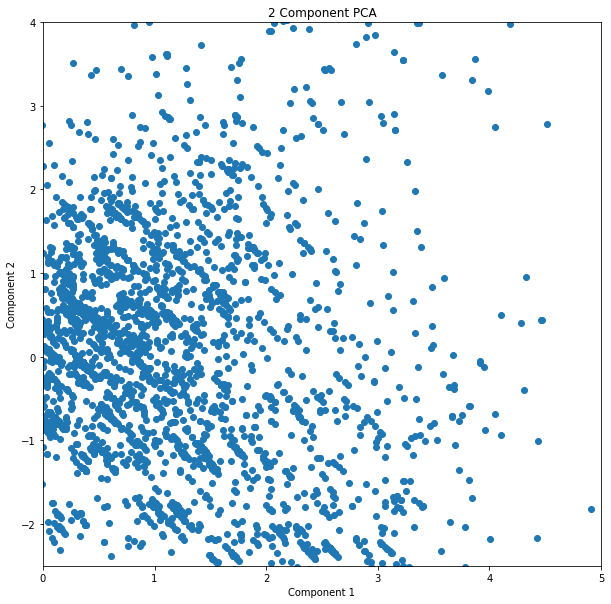

In [52]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])
plt.xlim([0,5])
plt.ylim([-2.5,4])

# **Kmeans**

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 30, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)

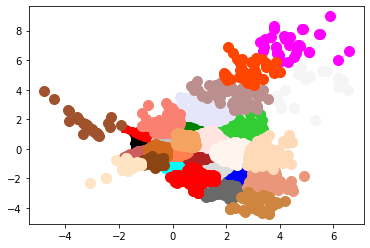

In [54]:
plt.scatter(principalComponents1[y_kmeans == 0, 0], principalComponents1[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(principalComponents1[y_kmeans == 1, 0], principalComponents1[y_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(principalComponents1[y_kmeans == 2, 0], principalComponents1[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(principalComponents1[y_kmeans == 3, 0], principalComponents1[y_kmeans == 3, 1], s = 100, c = 'cyan')
plt.scatter(principalComponents1[y_kmeans == 4, 0], principalComponents1[y_kmeans == 4, 1], s = 100, c = 'magenta')
plt.scatter(principalComponents1[y_kmeans == 5, 0], principalComponents1[y_kmeans == 5, 1], s = 100, c = 'limegreen')
plt.scatter(principalComponents1[y_kmeans == 6, 0], principalComponents1[y_kmeans == 6, 1], s = 100, c = 'lavender')
plt.scatter(principalComponents1[y_kmeans == 7, 0], principalComponents1[y_kmeans == 7, 1], s = 100, c = 'black')
plt.scatter(principalComponents1[y_kmeans == 8, 0], principalComponents1[y_kmeans == 8, 1], s = 100, c = 'dimgray')
plt.scatter(principalComponents1[y_kmeans == 9, 0], principalComponents1[y_kmeans == 9, 1], s = 100, c = 'silver')
plt.scatter(principalComponents1[y_kmeans == 10, 0], principalComponents1[y_kmeans == 10, 1], s = 100, c = 'gainsboro')
plt.scatter(principalComponents1[y_kmeans == 11, 0], principalComponents1[y_kmeans == 11, 1], s = 100, c = 'white')
plt.scatter(principalComponents1[y_kmeans == 12, 0], principalComponents1[y_kmeans == 12, 1], s = 100, c = 'whitesmoke')
plt.scatter(principalComponents1[y_kmeans == 13, 0], principalComponents1[y_kmeans == 13, 1], s = 100, c = 'rosybrown')
plt.scatter(principalComponents1[y_kmeans == 14, 0], principalComponents1[y_kmeans == 14, 1], s = 100, c = 'indianred')
plt.scatter(principalComponents1[y_kmeans == 15, 0], principalComponents1[y_kmeans == 15, 1], s = 100, c = 'firebrick')
plt.scatter(principalComponents1[y_kmeans == 16, 0], principalComponents1[y_kmeans == 16, 1], s = 100, c = 'red')
plt.scatter(principalComponents1[y_kmeans == 17, 0], principalComponents1[y_kmeans == 17, 1], s = 100, c = 'mistyrose')
plt.scatter(principalComponents1[y_kmeans == 18, 0], principalComponents1[y_kmeans == 18, 1], s = 100, c = 'salmon')
plt.scatter(principalComponents1[y_kmeans == 19, 0], principalComponents1[y_kmeans == 19, 1], s = 100, c = 'darksalmon')
plt.scatter(principalComponents1[y_kmeans == 20, 0], principalComponents1[y_kmeans == 20, 1], s = 100, c = 'coral')
plt.scatter(principalComponents1[y_kmeans == 21, 0], principalComponents1[y_kmeans == 21, 1], s = 100, c = 'orangered')
plt.scatter(principalComponents1[y_kmeans == 22, 0], principalComponents1[y_kmeans == 22, 1], s = 100, c = 'sienna')
plt.scatter(principalComponents1[y_kmeans == 23, 0], principalComponents1[y_kmeans == 23, 1], s = 100, c = 'seashell')
plt.scatter(principalComponents1[y_kmeans == 24, 0], principalComponents1[y_kmeans == 24, 1], s = 100, c = 'chocolate')
plt.scatter(principalComponents1[y_kmeans == 25, 0], principalComponents1[y_kmeans == 25, 1], s = 100, c = 'saddlebrown')
plt.scatter(principalComponents1[y_kmeans == 26, 0], principalComponents1[y_kmeans == 26, 1], s = 100, c = 'sandybrown')
plt.scatter(principalComponents1[y_kmeans == 27, 0], principalComponents1[y_kmeans == 27, 1], s = 100, c = 'peachpuff')
plt.scatter(principalComponents1[y_kmeans == 28, 0], principalComponents1[y_kmeans == 28, 1], s = 100, c = 'peru')
plt.scatter(principalComponents1[y_kmeans == 29, 0], principalComponents1[y_kmeans == 29, 1], s = 100, c = 'bisque')

In [55]:
a = np.array([y_kmeans])
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 442,
 1: 168,
 2: 266,
 3: 361,
 4: 35,
 5: 113,
 6: 124,
 7: 575,
 8: 114,
 9: 479,
 10: 237,
 11: 735,
 12: 19,
 13: 66,
 14: 281,
 15: 269,
 16: 175,
 17: 263,
 18: 142,
 19: 90,
 20: 373,
 21: 46,
 22: 33,
 23: 121,
 24: 517,
 25: 238,
 26: 308,
 27: 74,
 28: 69,
 29: 132}

In [56]:
y_kmeans.shape

(6865,)

In [57]:
df3['Cluster'] = y_kmeans
sub_clustering = df3.sort_values(by = 'Cluster')
sub_clustering.to_csv('sub_continents_clustering.csv')
sub_clustering.head()

,PrepTimeInMins,CookTimeInMins,Servings,salt - to taste,1/2 teaspoon turmeric powder (haldi),1 teaspoon red chilli powder,1 teaspoon cumin seeds (jeera),1 onion - finely chopped,1 teaspoon mustard seeds,1 sprig curry leaves,...,Course_North Indian Breakfast,Course_One Pot Dish,Course_Side Dish,Course_Snack,Course_South Indian Breakfast,Course_Sugar Free Diet,Course_Vegan,Course_Vegetarian,Course_World Breakfast,Cluster
911,15,30,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2714,10,30,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6588,40,20,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1014,15,45,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352,40,180,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df3['Cluster'].value_counts()

11    735
7     575
24    517
9     479
0     442
20    373
3     361
26    308
14    281
15    269
2     266
17    263
25    238
10    237
16    175
1     168
18    142
29    132
6     124
23    121
8     114
5     113
19     90
27     74
28     69
13     66
21     46
4      35
22     33
12     19
Name: Cluster, dtype: int64

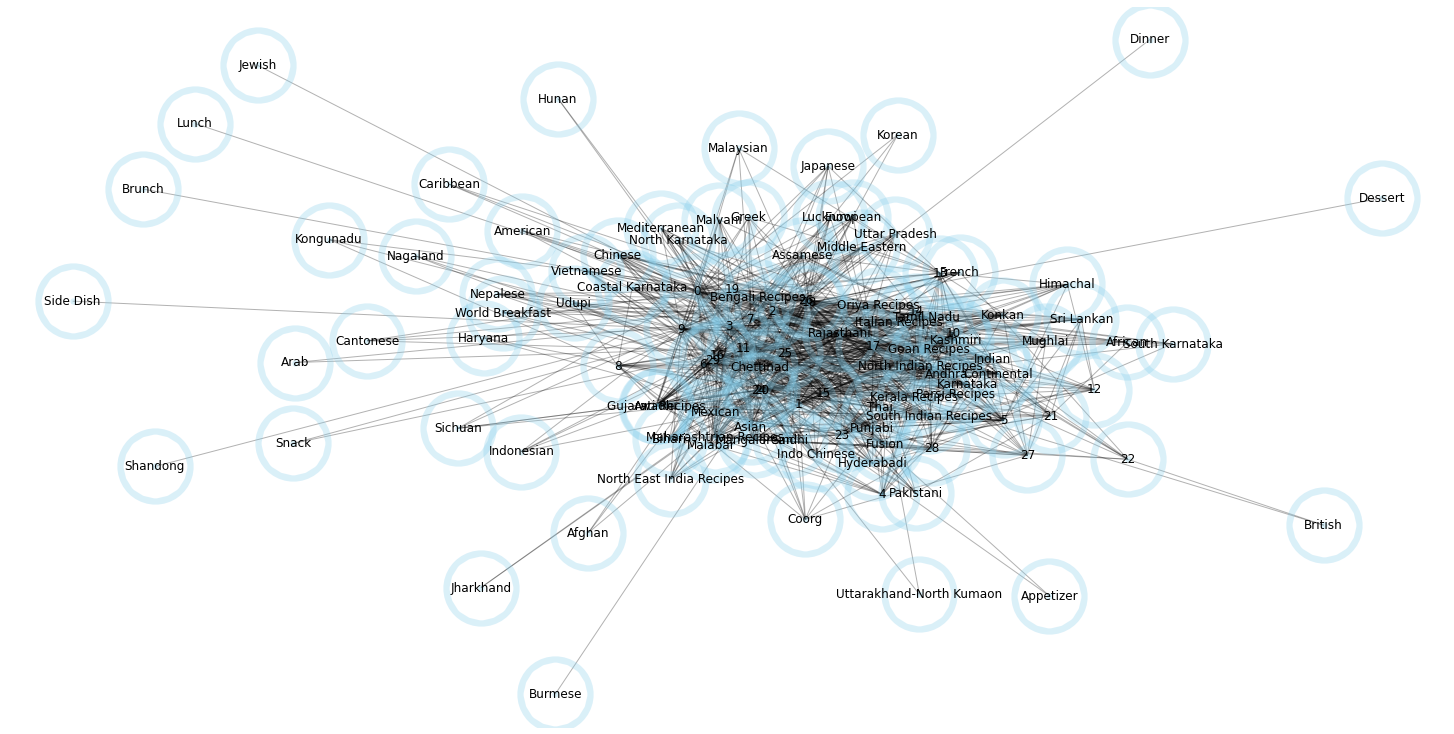

In [59]:
import networkx as nx
f = plt.figure(figsize=(20,10)) 

df_plot = pd.DataFrame()
df_plot['end'] =save_Cuisine
df_plot['start'] = sub_clustering['Cluster']

# Build your graph
G=nx.from_pandas_edgelist(df_plot, 'start', 'end')
 
# Graph with Custom nodes:
pos = nx.spring_layout(G, k=0.3*1/np.sqrt(25), iterations=10)
nx.draw(G,pos=pos,node_size=40, font_size = 15, node_color="skyblue", node_shape="o", alpha=0.3, linewidths=70)
nx.draw_networkx_labels(G, pos=pos)
f.savefig("Clusters.jpg", bbox_inches = 'tight')


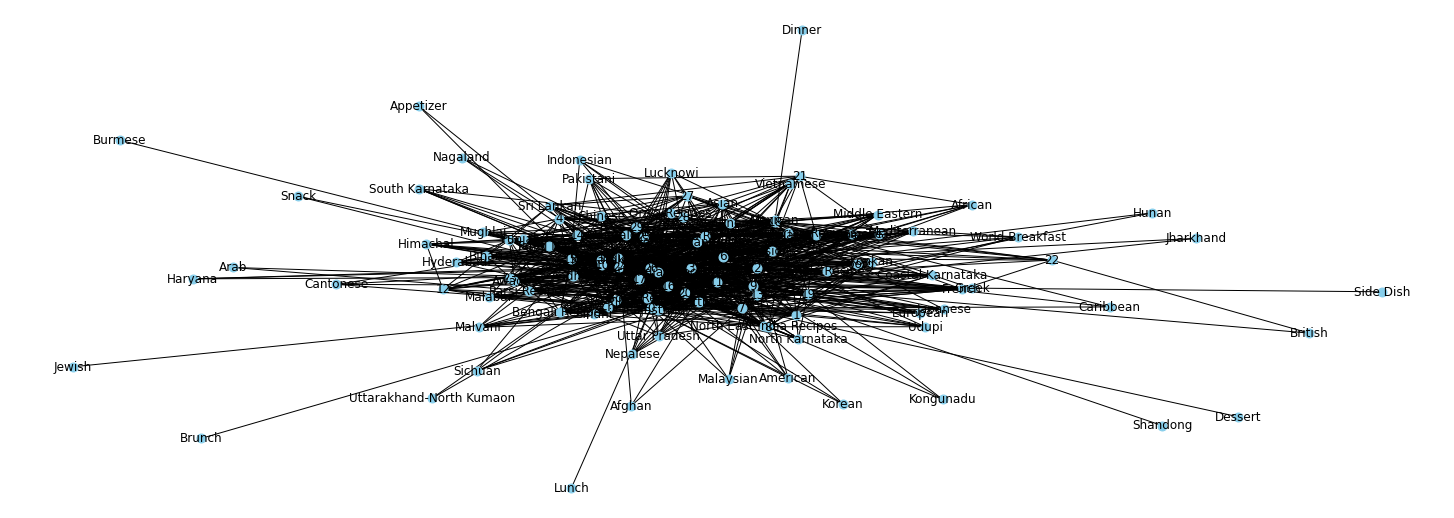

In [60]:
df4 = pd.DataFrame()
df4['end'] = save_Cuisine
df4['start'] = sub_clustering['Cluster']

# Build your graph
g=nx.from_pandas_edgelist(df4, 'start', 'end')

pos = nx.spring_layout(g, k=0.3*1/np.sqrt(25), iterations=10)
plt.figure(3, figsize=(20, 7))
nx.draw(g, pos=pos, node_size=80, font_size = 15, node_color="skyblue", node_shape="o")
nx.draw_networkx_labels(g, pos=pos)
plt.show()

In [61]:
df_cus = pd.DataFrame()

In [62]:
df_cus["Cuisine"]= save_Cuisine

In [63]:
df_cus[df3.columns] = df3

In [64]:
df_cus.head()

,Cuisine,PrepTimeInMins,CookTimeInMins,Servings,salt - to taste,1/2 teaspoon turmeric powder (haldi),1 teaspoon red chilli powder,1 teaspoon cumin seeds (jeera),1 onion - finely chopped,1 teaspoon mustard seeds,...,Course_North Indian Breakfast,Course_One Pot Dish,Course_Side Dish,Course_Snack,Course_South Indian Breakfast,Course_Sugar Free Diet,Course_Vegan,Course_Vegetarian,Course_World Breakfast,Cluster
0,Indian,15,30,6,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15
1,South Indian Recipes,5,10,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,South Indian Recipes,20,30,4,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,8
3,Andhra,15,30,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
4,Andhra,10,20,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,25


In [65]:
df_cus[df_cus["Cluster"]==1]["Cuisine"].value_counts()

South Indian Recipes     54
Tamil Nadu               16
Kerala Recipes           14
Andhra                   11
Indian                   11
Maharashtrian Recipes    10
North Indian Recipes      9
Gujarati Recipes﻿         8
Chettinad                 6
Karnataka                 5
Rajasthani                4
Konkan                    3
Udupi                     3
Mangalorean               2
North Karnataka           2
Goan Recipes              2
Coastal Karnataka         2
Uttar Pradesh             1
Kashmiri                  1
Asian                     1
Bengali Recipes           1
Coorg                     1
Malvani                   1
Name: Cuisine, dtype: int64

In [66]:
df_cus[df_cus["Cluster"]==20]["Cuisine"].value_counts()

Indian                      90
North Indian Recipes        62
Maharashtrian Recipes       21
Bengali Recipes             17
South Indian Recipes        16
Continental                 16
Goan Recipes                14
Kerala Recipes              11
Fusion                      11
Italian Recipes             11
Rajasthani                  11
Mexican                     10
Gujarati Recipes﻿            8
Kashmiri                     8
Karnataka                    5
Bihari                       5
Parsi Recipes                5
Punjabi                      5
Thai                         4
French                       4
Mughlai                      3
Mangalorean                  3
Tamil Nadu                   3
Asian                        3
Chettinad                    3
Indo Chinese                 3
Oriya Recipes                3
Sindhi                       3
Awadhi                       3
Andhra                       2
Uttar Pradesh                2
Vietnamese                   1
Malabar 

In [67]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_cus['Cuisine']= label_encoder.fit_transform(df_cus['Cuisine'])
  
df_cus['Cuisine'].unique()

array([33, 72,  3, 77, 54, 25, 19,  9, 65, 16, 75, 48, 60, 36, 70, 76, 17,
       42, 28, 20, 66,  6, 55, 18, 23, 41, 40, 46, 32, 69, 26,  5,  7, 10,
       49, 30,  8, 14, 59, 68, 56, 37, 52, 80, 11, 61, 64, 27, 58, 62, 24,
       34, 44, 53, 74, 29, 78, 51, 35,  1, 67, 45,  2, 43, 63, 15, 73,  4,
       79, 81, 50, 21, 31, 22, 71, 38, 13,  0, 12, 39, 57, 47])

In [68]:
df_cus.head()

,Cuisine,PrepTimeInMins,CookTimeInMins,Servings,salt - to taste,1/2 teaspoon turmeric powder (haldi),1 teaspoon red chilli powder,1 teaspoon cumin seeds (jeera),1 onion - finely chopped,1 teaspoon mustard seeds,...,Course_North Indian Breakfast,Course_One Pot Dish,Course_Side Dish,Course_Snack,Course_South Indian Breakfast,Course_Sugar Free Diet,Course_Vegan,Course_Vegetarian,Course_World Breakfast,Cluster
0,33,15,30,6,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15
1,72,5,10,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,72,20,30,4,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,8
3,3,15,30,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
4,3,10,20,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,25


In [69]:
df_cus.columns

Index(['Cuisine', 'PrepTimeInMins', 'CookTimeInMins', 'Servings',
       'salt - to taste', '1/2 teaspoon turmeric powder (haldi)',
       '1 teaspoon red chilli powder', '1 teaspoon cumin seeds (jeera)',
       '1 onion - finely chopped', '1 teaspoon mustard seeds',
       '1 sprig curry leaves', '1 teaspoon turmeric powder (haldi)',
       'salt - as per taste', 'नमक - स्वाद अनुसार',
       '1/4 teaspoon turmeric powder (haldi)',
       '1/2 teaspoon red chilli powder', '1 onion - chopped',
       '1/2 teaspoon mustard seeds', '2 green chillies - finely chopped',
       '1 tablespoon sunflower oil', '1/2 teaspoon cumin seeds (jeera)',
       '1 teaspoon coriander powder (dhania)',
       '1/4 teaspoon asafoetida (hing)', '1 teaspoon sunflower oil',
       '1 inch cinnamon stick (dalchini)', '1 teaspoon black pepper powder',
       '1 teaspoon garam masala powder', '1 teaspoon cumin powder (jeera)',
       '2 cardamom (elaichi) pods/seeds', '4 cloves garlic - chopped',
       '1 bay l

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
y_true = df_cus['Cuisine']
y_pred = df_cus["Cluster"]
confusion_matrix(y_true, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       [2, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [72]:
from sklearn.metrics import classification_report,f1_score

In [73]:
print("Accuracy:",metrics.accuracy_score(y_true, y_pred))

Accuracy: 0.008448652585579024


In [74]:
f1_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))

0.013983340153744894

In [75]:
df_cus.head()

,Cuisine,PrepTimeInMins,CookTimeInMins,Servings,salt - to taste,1/2 teaspoon turmeric powder (haldi),1 teaspoon red chilli powder,1 teaspoon cumin seeds (jeera),1 onion - finely chopped,1 teaspoon mustard seeds,...,Course_North Indian Breakfast,Course_One Pot Dish,Course_Side Dish,Course_Snack,Course_South Indian Breakfast,Course_Sugar Free Diet,Course_Vegan,Course_Vegetarian,Course_World Breakfast,Cluster
0,33,15,30,6,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15
1,72,5,10,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,72,20,30,4,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,8
3,3,15,30,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
4,3,10,20,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,25


# **drop col with only 0**

In [76]:
df_cus=df_cus.T[(df_cus != 0).any()].T

#  **DecisionTreeClassifier**

In [77]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
y =df_cus['Cuisine']
x = df_cus.drop(columns=["Cuisine","Cluster","Servings","PrepTimeInMins","CookTimeInMins"])




x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#y_train_label_en= pd.get_dummies(y_train)
#y_test_label_en= pd.get_dummies(y_test)
# y_train_label_en= pd.get_dummies(y_train)
# y_test_label_en= pd.get_dummies(y_test)

sc = StandardScaler()
x_scale_train =sc.fit_transform(x_train)
x_scale_test =sc.fit_transform(x_test)


In [78]:
y_train

4138    65
4449    33
5400    72
1373    42
3804    33
        ..
477     19
6704    44
6287    19
6015    33
535     60
Name: Cuisine, Length: 5492, dtype: int64

In [79]:
decision_Tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
decision_Tree.fit(x_scale_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [80]:
decision_Tree.score(x_scale_test,y_test)

0.2716678805535324

In [81]:
decision_Tree_2 = DecisionTreeClassifier(max_depth=10).fit(x_train,y_train)
decision_Tree_2.score(x_scale_test,y_test)

0.2869628550619082

In [82]:
#kfold cross validation
kfold =KFold(n_splits=10, random_state=100)

C:\yotambraun\anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [83]:
results_kfold = cross_val_score(decision_Tree, x_scale_train , y_train , cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 27.15%


# **GradientBoostingClassifier**

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
model_GradientBoosting = GradientBoostingClassifier()

In [85]:
GradientBoosting =model_GradientBoosting.fit(x_scale_train, y_train)

In [86]:
yhat = model_GradientBoosting.predict(x_scale_test)

In [87]:
yhat

array([72, 33, 33, ..., 19, 19, 19], dtype=int64)

In [88]:
GradientBoosting.score(x_scale_test, y_test)

0.30881281864530225

In [89]:
results_kfold_gradient = cross_val_score(GradientBoosting, x_scale_train , y_train , cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold_gradient.mean()*100.0)) 

Accuracy: 29.35%


In [90]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, yhat))

print("Classification Report")
print(classification_report(y_test, yhat))

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         2
           8       1.00      0.11      0.20         9
           9       0.27      0.10      0.15        29
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         2
          16       0.18      0.18      0.18        11
          17       0.11      0.07      0.09        14
          18       0.00      0.00      0.00         2
          19       0.39      0.71      0.51       220
          20       0.00      

C:\yotambraun\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\yotambraun\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



# **SVM**

In [91]:
from sklearn import svm
from sklearn import metrics

In [92]:
svm = svm.SVC(kernel='linear') # Linear Kernel

svm.fit(x_scale_train, y_train)
y_pred = svm.predict(x_scale_test)

In [93]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3168244719592134


In [94]:
results_kfold = cross_val_score(svm, x_scale_train , y_train , cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 30.84%


# **RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters = [{"C":[10,100],"kernel":["linear"]},{"C":[10,100],"kernel":["rbf"],'gamma': [ 0.01, 1]}]
random_search = RandomizedSearchCV(estimator=svm,param_distributions=parameters,cv=3,n_iter =2)
random_search =random_search.fit(x_scale_train,y_train)

In [96]:
accuracy  = random_search.best_score_

In [97]:
accuracy

0.3029855185785386

In [98]:
random_search.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

In [99]:
from sklearn import svm
svm_grid = svm.SVC(kernel='linear') # Linear Kernel

svm_grid.fit(x_scale_train, y_train)
y_pred = svm_grid.predict(x_scale_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3168244719592134


In [100]:
results_kfold_grid = cross_val_score(svm_grid, x_scale_train , y_train , cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold_grid.mean()*100.0)) 

Accuracy: 30.84%


# **KNeighborsClassifier**

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_scale_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [103]:
y_pred=knn.predict(x_scale_test)
metrics.accuracy_score(y_test,y_pred)

0.30517115804806993

In [104]:
range_of_k=range(1,40)
scores=[]
for k in range_of_k:
         knn = KNeighborsClassifier(n_neighbors=k)
         knn.fit(x_scale_train, y_train)
         y_pred = knn.predict(x_scale_test)
         scores.append(metrics.accuracy_score(y_test, y_pred))
scores

[0.12891478514202476,
 0.15076474872541878,
 0.1886380189366351,
 0.213401310997815,
 0.20029133284777859,
 0.20975965040058267,
 0.21849963583394028,
 0.2556445739257101,
 0.2337946103423161,
 0.23306627822286963,
 0.2294246176256373,
 0.2651128914785142,
 0.2825928623452294,
 0.28623452294246177,
 0.29133284777858703,
 0.2949745083758194,
 0.29570284049526585,
 0.3008011653313911,
 0.29715950473415875,
 0.30517115804806993,
 0.30444282592862343,
 0.303714493809177,
 0.31099781500364165,
 0.31318281136198106,
 0.3102694828841952,
 0.3008011653313911,
 0.3008011653313911,
 0.30735615440640934,
 0.30954115076474875,
 0.3168244719592134,
 0.31318281136198106,
 0.3117261471230881,
 0.314639475600874,
 0.3117261471230881,
 0.3168244719592134,
 0.3190094683175528,
 0.3160961398397669,
 0.3139111434814275,
 0.3160961398397669]

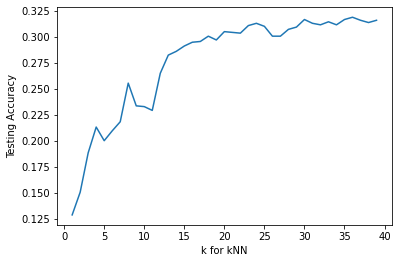

In [105]:
plt.plot(range_of_k,scores)
plt.xlabel('k for kNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [106]:
results_kfold = cross_val_score(knn, x_scale_train , y_train , cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 29.24%


# **Naive Bayes**

In [107]:
from sklearn.naive_bayes import GaussianNB


In [108]:
gnb=GaussianNB()

In [109]:
y_pred_gnb=gnb.fit(x_scale_train,y_train).predict(x_scale_test)

In [110]:
cnf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

In [111]:
metrics.accuracy_score(y_test,y_pred_gnb)

0.17407137654770574

# **RandomForest Classifier**

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [114]:
y_pred_rand_forest = clf.fit(x_scale_train, y_train).predict(x_scale_test)

In [115]:
cnf_matrix_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)

In [116]:
metrics.accuracy_score(y_test,y_pred_rand_forest)

0.25710123816460306

# **LogisticRegression**

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
LogisticR = LogisticRegression(random_state=0).fit(x_scale_train,y_train).predict(x_scale_test)

C:\yotambraun\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [119]:
metrics.accuracy_score(y_test,LogisticR)

0.32046613255644574

# **Back to df with diet and try to handle the NA values**

In [120]:
df_with_diet = df2.copy()

In [121]:
df_with_diet = df_with_diet.drop(['recipeName', 'ingredients','instructions','TotalTimeInMins'], axis=1)

In [122]:
df_with_diet.columns

Index(['PrepTimeInMins', 'CookTimeInMins', 'Servings', 'Cuisine', 'Course',
       'Diet', 'salt - to taste', '1/2 teaspoon turmeric powder (haldi)',
       '1 teaspoon red chilli powder', '1 teaspoon cumin seeds (jeera)',
       '1 onion - finely chopped', '1 teaspoon mustard seeds',
       '1 sprig curry leaves', '1 teaspoon turmeric powder (haldi)',
       'salt - as per taste', 'नमक - स्वाद अनुसार',
       '1/4 teaspoon turmeric powder (haldi)',
       '1/2 teaspoon red chilli powder', '1 onion - chopped',
       '1/2 teaspoon mustard seeds', '2 green chillies - finely chopped',
       '1 tablespoon sunflower oil', '1/2 teaspoon cumin seeds (jeera)',
       '1 teaspoon coriander powder (dhania)',
       '1/4 teaspoon asafoetida (hing)', '1 teaspoon sunflower oil',
       '1 inch cinnamon stick (dalchini)', '1 teaspoon black pepper powder',
       '1 teaspoon garam masala powder', '1 teaspoon cumin powder (jeera)',
       '2 cardamom (elaichi) pods/seeds', '4 cloves garlic - chopped

In [123]:
df_with_diet[['PrepTimeInMins', 'CookTimeInMins']] = df_with_diet[['PrepTimeInMins', 'CookTimeInMins']].replace(-1, np.NaN)

In [124]:
df_with_diet['PrepTimeInMins'] = df_with_diet['PrepTimeInMins'].fillna(df['PrepTimeInMins'].mean())
df_with_diet['CookTimeInMins'] = df_with_diet['CookTimeInMins'].fillna(df['CookTimeInMins'].mean())

In [125]:
df_with_diet.head()

,PrepTimeInMins,CookTimeInMins,Servings,Cuisine,Course,Diet,salt - to taste,1/2 teaspoon turmeric powder (haldi),1 teaspoon red chilli powder,1 teaspoon cumin seeds (jeera),...,1 teaspoon garam masala powder,1 teaspoon cumin powder (jeera),2 cardamom (elaichi) pods/seeds,4 cloves garlic - chopped,1 bay leaf (tej patta),sunflower oil - as required,1 teaspoon sugar,1 teaspoon fennel seeds (saunf),2 cloves (laung),1 inch ginger - chopped
0,15,30,6,Indian,Side Dish,Diabetic Friendly,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5,10,3,South Indian Recipes,Main Course,Vegetarian,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,30,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,30,4,Andhra,Lunch,Non Vegeterian,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,10,20,4,Andhra,South Indian Breakfast,Vegetarian,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
label_encoder = LabelEncoder()

df_with_diet['Diet'] = label_encoder.fit_transform(df_with_diet['Diet'])
df_with_diet['Cuisine'] = label_encoder.fit_transform(df_with_diet['Cuisine'])
df_with_diet['Course'] = label_encoder.fit_transform(df_with_diet['Course'])

In [127]:
df_with_diet.head()

,PrepTimeInMins,CookTimeInMins,Servings,Cuisine,Course,Diet,salt - to taste,1/2 teaspoon turmeric powder (haldi),1 teaspoon red chilli powder,1 teaspoon cumin seeds (jeera),...,1 teaspoon garam masala powder,1 teaspoon cumin powder (jeera),2 cardamom (elaichi) pods/seeds,4 cloves garlic - chopped,1 bay leaf (tej patta),sunflower oil - as required,1 teaspoon sugar,1 teaspoon fennel seeds (saunf),2 cloves (laung),1 inch ginger - chopped
0,15,30,6,33,13,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5,10,3,72,8,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,30,4,72,15,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,30,4,3,7,6,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,10,20,4,3,15,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
y_Diet = df_with_diet['Diet']
    
X_Diet = df_with_diet[["Course","Cuisine","PrepTimeInMins","CookTimeInMins"]]


In [129]:
X_Diet.head()

,Course,Cuisine,PrepTimeInMins,CookTimeInMins
0,13,33,15,30
1,8,72,5,10
2,15,72,20,30
3,7,3,15,30
4,15,3,10,20


In [130]:
scaler = StandardScaler()

X_Diet_scale = scaler.fit_transform(X_Diet)


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_Diet_scale, y_Diet,train_size=0.7, random_state=42)


# **repeat the process**

# **SVM**

In [132]:
svm = svm.SVC(kernel='linear') # Linear Kernel

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [133]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6951456310679611


In [141]:
results_kfold = cross_val_score(svm, X_train , y_train , cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 68.14%


# **KNeighborsClassifier**

In [142]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [143]:
y_pred=knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.6810679611650485

In [144]:
results_kfold = cross_val_score(knn, X_train , y_train , cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 67.58%


# **Naive Bayes**

In [145]:
y_pred_gnb=gnb.fit(X_train,y_train).predict(X_test)

In [146]:
cnf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

In [147]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_gnb))

Accuracy: 0.5495145631067961


# **RandomForest Classifier**

In [148]:
y_pred_rand_forest = clf.fit(X_train, y_train).predict(X_test)

In [149]:
cnf_matrix_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)

In [150]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_rand_forest))

Accuracy: 0.6951456310679611


# **LogisticRegression**

In [151]:
LogisticR_diet = LogisticRegression(random_state=0).fit(X_train,y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,LogisticR_diet))

Accuracy: 0.6951456310679611


**Explore with pandasql**
# SQL

In [152]:
!pip install pandasql

In [153]:
import pandasql


In [154]:
pandasql.sqldf("SELECT * FROM df where TotalTimeInMins > 1000 LIMIT 5;", globals())


,recipeName,ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,instructions
0,Kavati recipe - Nepali Beans Soup (Recipe),"1/2 cup rajma, 1/2 cup green moong dal - poori...",1440,30,1470,4,Nepalese,Dinner,High Protein Vegetarian,कवाती को बनाने के लिए सबसे पहले सभी तरह के बीन...
1,Traditional Christmas Cake Recipe,"3/4 cup Black raisins,1/4 cup Prunes - chopped...",2880,45,2925,1,Continental,Dessert,Eggetarian,To begin making the Traditional Christmas Cake...
2,Bhagara Peetha Recipe - Baghara Pitha,"1 कप सफेद उरद दाल (split),1 बड़े चमच्च मेथी के ...",1440,30,1470,4,Oriya Recipes,Indian Breakfast,Vegetarian,भगारा पीठा बनाने के लिए सबसे पहले उरददाल और मे...
3,Homemade Quick Puff Pastry Sheet Recipe | Perf...,"315 grams All Purpose Flour (Maida),5 grams Sa...",1440,0,1440,2,Continental,Vegetarian,Diabetic Friendly,To begin making the Quick Puff Pastry Recipe S...


In [155]:
pandasql.sqldf("SELECT * FROM df    WHERE Cuisine = 'Indian' AND Course='Dessert' order by TotalTimeInMins desc LIMIT 10;", globals())


,recipeName,ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,instructions
0,Bottle Gourd Ice Cream Recipe - Lauki Ice Cream,"1 Bottle gourd (lauki),500 ml Milk - (with ful...",600,10,610,3,Indian,Dessert,Vegetarian,To begin making Bottle Gourd Ice Cream Recipe ...
1,Masala Chai Kulfi Recipe With Bourbon Chocolat...,"2 cups Water,1/2 cup Milk - warm,1-1/2 teaspoo...",500,45,545,4,Indian,Dessert,Vegetarian,"To begin making the Masala Chai Kulfi, we proc..."
2,Dry Fruits Suzhiyam (Boorelu) With Black Rice ...,"Sunflower Oil - for deep fry,1 cup White Urad ...",10,410,420,4,Indian,Dessert,Vegetarian,To begin making the Dry Fruits Suzhiyam (Boore...
3,Tender Coconut Ice Cream Recipe,"1/2 cup Tender coconut water,1 cup Fresh cream...",360,0,360,8,Indian,Dessert,Vegetarian,To begin making the Tender Coconut Ice Cream r...
4,Vegan Carrot Halwa Ice Cream Recipe,"2-1/2 cup Carrot (Gajjar) - finely grated,2-1/...",25,300,325,8,Indian,Dessert,Vegan,To prepare Vegan Carrot Halwa Ice Cream Recipe...
5,Passion Fruit- Shrikhand Shots Recipe,"1 cup Curd (Dahi / Yogurt),1 Passion fruit - (...",240,15,255,4,Indian,Dessert,Vegetarian,To begin making Passion Fruit- Shrikhand Shots...
6,Lemon 7 Up Cake Recipe,"3/4 lb Butter - softened,3 cups Sugar,5 Whole ...",105,90,195,20,Indian,Dessert,Vegetarian,"To begin making the Lemon 7 Up Cake recipe, cr..."
7,Apple Pie Ice Cream Recipe,"2 Apples,2 teaspoon Cinnamon Powder (Dalchini)...",30,120,150,6,Indian,Dessert,Vegetarian,To begin making the Apple Pie Ice Cream recipe...
8,Creamy Mango Kulfi Recipe With Cream Cheese,"1 cup Mango Pulp (Puree),1 cup Mango (Ripe) - ...",20,120,140,12,Indian,Dessert,Vegetarian,Cream Cheese Mango Kulfi is an easy recipe to ...
9,Fruit-Chia Rice paper rolls in a Mango Tahini ...,"Rice paper rolls - as needed,2 Fresh Figs - sl...",10,120,130,4,Indian,Dessert,Vegetarian,Prepare Fruit-Chia Rice paper rolls in a Mango...


In [156]:
pandasql.sqldf("SELECT Count(*) FROM df    WHERE Course = 'Dessert' AND Diet = 'Vegetarian' ;", globals())


,Count(*)
0,544


**Is there a High Protein Non Vegetarian which is also a Dessert?**

In [157]:
pandasql.sqldf("SELECT Count(*) FROM df    WHERE Course = 'Dessert' AND Diet = 'High Protein Non Vegetarian' ;", globals())


,Count(*)
0,1


In [158]:
pandasql.sqldf("SELECT * FROM df    WHERE   Diet = 'High Protein Non Vegetarian' OR  Diet = 'Vegetarian' GROUP BY TotalTimeInMins  order by TotalTimeInMins desc;", globals())


,recipeName,ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,instructions
0,Bhagara Peetha Recipe - Baghara Pitha,"1 कप सफेद उरद दाल (split),1 बड़े चमच्च मेथी के ...",1440,30,1470,4,Oriya Recipes,Indian Breakfast,Vegetarian,भगारा पीठा बनाने के लिए सबसे पहले उरददाल और मे...
1,Kollu Masala Dosa Recipe - High Protein Horse ...,"1 cup Rice,1/2 cup Horse Gram Dal (Kollu/ Kuli...",930,30,960,4,Konkan,South Indian Breakfast,Vegetarian,"To make Horse Gram Masala Dosa Recipe, first c..."
2,Homemade Mango Ice-Cream Recipe,"400 ml Fresh cream - Amul,1 cup Mango Pulp (Pu...",20,900,920,6,Continental,Dessert,Vegetarian,To begin making the Homemade Mango Ice-Cream R...
3,Ragi Or Finger Millet Powder/ Malt Recipe for ...,1 cup Sprouted Ragi,840,10,850,10,Indian,High Protein Vegetarian,Vegetarian,"To begin making Ragi Powder/malt, you have to ..."
4,Spicy Mexican Layered Chilli Rice Recipe,1 cup Rajma (Large Kidney Beans) - soaked for ...,740,25,765,4,Mexican,Main Course,Vegetarian,To begin making the Spicy Mexican Layered Chil...
...,...,...,...,...,...,...,...,...,...,...
133,Kesar Chai Recipe - A Delicious Saffron Flavor...,"2 cups Water,1 teaspoon Tea leaves,1/4 cup Mil...",0,10,10,2,North Indian Recipes,North Indian Breakfast,Vegetarian,"To begin making the Kesar Chai, add water into..."
134,Pepper Tea Recipe - Kali Mirch Chai,"2-1/2 cups Water,1 teaspoon Whole Black Pepper...",2,5,7,2,Indian,Vegetarian,High Protein Non Vegetarian,"To begin making Pepper Tea Recipe, prep all th..."
135,Indian Beaten Coffee Recipe | Dalgona Coffee,"2 tablespoons Instant Coffee Powder,2 tablespo...",5,0,5,1,North Indian Recipes,Indian Breakfast,Vegetarian,To begin making the Indian Beaten Coffee/ Dalg...
136,Coffee Recipe With Instant Coffee Powder,"2 cups Milk,2 tablespoons Fresh cream - (optio...",2,2,4,2,Indian,Vegetarian,Vegetarian,To begin making Coffee Recipe With Instant Cof...


# **Some NLP**

In [159]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
import unicodedata
import sys

nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 


[nltk_data] Downloading package stopwords to C:\Users\יותם
[nltk_data]     בראון\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [160]:
text_ingredients = df["ingredients"]

In [161]:
first_word = np.random.choice(text_ingredients)
chain = [first_word]
n_words = 30

In [162]:
chain

['8 Rice paper rolls,Coriander (Dhania) Leaves - small bunch,Mint Leaves (Pudina),1 Cucumber - julienned,1 Carrot (Gajjar) - julienned,1/2 Red Bell pepper (Capsicum) - julienned,1/2 cup Tofu - or paneer (Indian cottage cheese),1 teaspoon Soy sauce,1/2 teaspoon Red Chilli flakes,Salt and Pepper - to taste (optional),1 teaspoon Sunflower Oil,1/4 cup Peanut Butter,1 teaspoon Soy sauce,2 teaspoons Red Chilli sauce - or Sriracha sauce,1/2 teaspoon Lemon juice,Roasted Peanuts (Moongphali) - crushed,1/4 teaspoon Red Chilli flakes - (adjust']

In [163]:
MEASURE_TOKENS = [
    'cup', 'can', 'teaspoon', 'tsp', 'tablespoon', 'tbsp', 'pound', 'lb', 'jar', 'bottle', 'stick', 'about', 'pounds','cups'
    'pinch', 'appx', 'half', 'optional', 'milliter', 'micro', 'ounce', 'small', 'large', 'medium', 'envelope', 
    'ear', 'piece', 'drops', 'oz', 'bunch', 'slice', 'spoonful', 'advertisement']

PREP_TOKENS = [
    'diced', 'stewed', 'chopped', 'crumbled', 'peeled', 'minced', 'fresh', 'divided', 'cooked', 'washed', 'softened',
    'sliced', 'deveined', 'shaken', 'finely', 'toasted', 'frozen', 'mixed', 'cut', 'squeezed', 'cracked', 'halved',
    'roasted', 'grilled','dried', 'freshly', 'ground', 'coarse', 'beaten', 'blend', 'blended', 'seeded', 
    'grated', 'chilled', 'garnish', 'discarded', 'powdered', 'cooled', 'sifted', 'drained', 'granulated', 'crushed']
def remove_stop_words(s):
    return ' '.join([i for i in s.split(' ') if i not in stop_words])

def remove_measure_prep(s):
    return ' '.join([i for i in s.split(' ') if i not in MEASURE_TOKENS and i not in PREP_TOKENS ]) 

def replace_plurals(s):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(i) for i in s.split(' ')])
 




def remove_digits(s):
    return re.sub(r'[\d]','',s)	

def remove_trailing_s(token):
    if token.endswith('s'):
        return token[:-1]
    else:
        return token

def preprocess_ingredients(ingredients_list):
    preprocess_ingredients = []
    for ingredient in ingredients_list:
        ingredient = ingredient.lower()
        ingredient = remove_digits(ingredient)
        ingredient = remove_measure_prep(ingredient)

        ingredient = remove_stop_words(ingredient)

        preprocess_ingredients.append(ingredient.strip())

    return preprocess_ingredients  

text_ingredients_preprocess = preprocess_ingredients(df["ingredients"])

punc_8 =['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}',"‘","’", '~',"”","’","’","“","***","****","—","*****","^","...","a","ye","d","the","and",str(range(0,1000))]
remove_and_clean_final = [i for i in text_ingredients_preprocess if i not in punc_8]
corpus = [i.replace('\n',' ') for i in remove_and_clean_final]
corpus = [i.replace('\t',' ') for i in corpus]
corpus = [i.replace('“', ' " ') for i in corpus]
corpus = [i.replace('”', ' " ') for i in corpus]
for spaced in ['.','-',',','!','?','(','—',')']:
    corpus =[i.replace(spaced, ' {0} '.format(spaced)) for i in text_ingredients]
len(corpus) #10510355 characters

6865

In [164]:
pip install markovify


Note: you may need to restart the kernel to use updated packages.


In [165]:
import markovify
# Build the model Markov chain
text_model = markovify.Text(corpus)

In [166]:
#Generate random recipe

for i in range(1):
  print(text_model.make_sentence())


1 cup potato masala, garlic chutney - as per use, make 3 tomatoes - finely chopped, 1 inch lentil sugar, 2 teaspoons tamarind paste, 2 teaspoons whole pepper - crush, 1 tbsp Spoon peanuts, 2 tablespoons oil, 1/4 tsp salt - as per taste


In [167]:
for i in range(1):
  print(text_model.make_short_sentence(140))

1/2 cup kisamis, salt - According to use


In [168]:
row = str([cell.encode('utf-8') for cell in corpus])

In [169]:
for recipe_index, recipe in enumerate(corpus[:10]):
    print('Recipe #{} length: {}'.format(recipe_index + 1, len(recipe)))

Recipe #1 length: 333
Recipe #2 length: 313
Recipe #3 length: 313
Recipe #4 length: 524
Recipe #5 length: 250
Recipe #6 length: 467
Recipe #7 length: 520
Recipe #8 length: 335
Recipe #9 length: 386
Recipe #10 length: 271


In [170]:
from nltk.tokenize import word_tokenize

corpus_words = [i.split() for i in corpus]
punc_8 =['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}',"‘","’", '~',"”","’","’","“","***","****","—","*****","^","...","a","ye","d","the","and",str(range(0,1000))]
remove_and_clean_final = [i for i in corpus_words if i not in punc_8]

In [171]:
text = nltk.Text(remove_and_clean_final)
